In [19]:
#%The supercell gemoetry
import math
import meep as mp

#na = 1
#r = 0.0725
#n = math.sqrt(32)
def DiamondLattice(eps,r,nx,ny,nz,ax,ay,az):
    #
    L = math.sqrt(3)/4.0
    hs = math.sqrt(3)/12.0
    pad = 3.0
    geometry_lattice = mp.Lattice(size=mp.Vector3(nx*ax+1,ny*ay+1,nz*az+1))
    #v1 = mp.Vector3(1)

    #displace vector to fill the whole supercell
    v2 = mp.Vector3(0.5*ax,0.5*ay,0)
    v1 = mp.Vector3(0,ay*1.0/3.0,az*1.0/3.0)
    v5 = mp.Vector3(ax*0.5,ay*5.0/6.0,az*1.0/3.0)
    v3 = mp.Vector3(ax*0.5,ay*1.0/6.0,az*2.0/3.0)
    v4 = mp.Vector3(0,ay*2.0/3.0,az*2.0/3.0)

    m = mp.Medium(epsilon=eps)
    #center of the four supercell rod
    c1 = mp.Vector3(0,-math.sqrt(6)/12,-hs/2)
    c2 = mp.Vector3(math.sqrt(2)/8,math.sqrt(6)/24,-hs/2)
    c3 = mp.Vector3(-math.sqrt(2)/8,math.sqrt(6)/24,-hs/2)
    c4 = mp.Vector3(0,0,L/2)
    geometry = [mp.Cylinder(center=c1,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v1,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v1,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v1,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v1,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v2,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v2,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v2,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v2,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v3,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v3,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v3,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v3,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v4,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v4,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v4,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v4,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v5,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v5,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v5,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v5,radius=r, material=m, height=L, axis=c4)]

    geometry = mp.geometric_objects_lattice_duplicates(geometry_lattice, geometry, ax,ay,az)
    geometry.append(mp.Block(center=mp.Vector3(0,0, (nz*az+pad)/2.0), size=mp.Vector3(nx*ax, ny*ay, pad),material=mp.air))
    geometry.append(mp.Block(center=mp.Vector3(0,0,-(nz*az+pad)/2.0), size=mp.Vector3(nx*ax, ny*ay, pad),material=mp.air))
    geometry.append(mp.Block(center=mp.Vector3( (nx*ax+pad)/2.0,0,0), size=mp.Vector3(pad, ny*ay, nz*az),material=mp.air))
    geometry.append(mp.Block(center=mp.Vector3(-(nx*ax+pad)/2.0,0,0), size=mp.Vector3(pad, ny*ay, nz*az),material=mp.air))
    
    geometry.append(mp.Block(center=mp.Vector3( (nx*ax+pad)/2.0,0, (nz*az+pad)/2.0), size=mp.Vector3(pad, ny*ay, pad),material=mp.air))
    geometry.append(mp.Block(center=mp.Vector3(-(nx*ax+pad)/2.0,0, (nz*az+pad)/2.0), size=mp.Vector3(pad, ny*ay, pad),material=mp.air))
    geometry.append(mp.Block(center=mp.Vector3( (nx*ax+pad)/2.0,0,-(nz*az+pad)/2.0), size=mp.Vector3(pad, ny*ay, pad),material=mp.air))
    geometry.append(mp.Block(center=mp.Vector3(-(nx*ax+pad)/2.0,0,-(nz*az+pad)/2.0), size=mp.Vector3(pad, ny*ay, pad),material=mp.air))
    
    geometry.append(mp.Block(center=mp.Vector3(0, (ny*ay+pad)/2.0,0), size=mp.Vector3(nx*ax+2*pad, pad, nz*az+2*pad),material=mp.air))
    geometry.append(mp.Block(center=mp.Vector3(0,-(ny*ay+pad)/2.0,0), size=mp.Vector3(nx*ax+2*pad, pad, nz*az+2*pad),material=mp.air))
    geometry.append(mp.Cylinder(center=c4,radius=r, material=mp.air, height=L, axis=c4))
    return geometry, geometry_lattice

In [ ]:
#supercell size
nx = 12
ny = 7
nz = 5
r = 0.0725 #rod radius
eps = 32 #material epsilon
#lattice vectors
ax = math.sqrt(2)/2.0
ay = math.sqrt(6)/2.0
az = math.sqrt(3)
#get the geometry and cell
geometry,geometry_lattice=DiamondLattice(eps,r,nx,ny,nz,ax,ay,az)
dpml = 1.0

cell = mp.Vector3(nx*ax+2*dpml,ny*ay+2*dpml,nz*az+2*dpml)

resolution = 20
pml_layers = [mp.PML(dpml)]
pos = mp.Vector3(0,0,az/8.0)

fcen = 0.54
df = 0.05
sources = [mp.Source(src=mp.GaussianSource(fcen, fwidth=df), component=mp.Ez, center=pos)]
sim = mp.Simulation(cell_size=cell,
                    geometry=geometry, eps_averaging=False,
                    boundary_layers=pml_layers,
                    sources=sources,
                    resolution=resolution)

h = mp.Harminv(mp.Ez, pos, fcen, df)
sim.run(mp.after_sources(h), until_after_sources=100)

#m = h.modes[0]
#f = m.freq
#Q = m.Q
#sim.run(mp.dft_ldos(fcen, df, 100), until_after_sources=100)
#sim.run(until=100)
mp.output_epsilon(sim)
mp.output_hpwr(sim)

-----------
Initializing structure...
Meep progress: 0.025/300.0 = 0.0% done in 10.7s, 128865.9s to go
Meep progress: 0.5/300.0 = 0.2% done in 14.9s, 8936.0s to go
Meep progress: 0.975/300.0 = 0.3% done in 19.1s, 5852.9s to go
Meep progress: 1.45/300.0 = 0.5% done in 23.3s, 4787.6s to go
Meep progress: 1.925/300.0 = 0.6% done in 27.4s, 4244.2s to go
Meep progress: 2.4/300.0 = 0.8% done in 31.6s, 3917.0s to go
Meep progress: 2.875/300.0 = 1.0% done in 35.8s, 3699.5s to go
Meep progress: 3.35/300.0 = 1.1% done in 40.0s, 3539.4s to go
Meep progress: 3.825/300.0 = 1.3% done in 44.2s, 3419.0s to go
Meep progress: 4.3/300.0 = 1.4% done in 48.3s, 3324.2s to go
Meep progress: 4.775/300.0 = 1.6% done in 52.5s, 3246.1s to go
Meep progress: 5.25/300.0 = 1.8% done in 56.7s, 3181.2s to go
Meep progress: 5.725/300.0 = 1.9% done in 60.8s, 3126.9s to go
Meep progress: 6.2/300.0 = 2.1% done in 65.0s, 3079.1s to go
Meep progress: 6.675/300.0 = 2.2% done in 69.2s, 3040.0s to go
Meep progress: 7.15/300.0 

Meep progress: 60.775/300.0 = 20.3% done in 544.6s, 2143.7s to go
Meep progress: 61.25/300.0 = 20.4% done in 548.8s, 2139.1s to go
Meep progress: 61.725/300.0 = 20.6% done in 552.9s, 2134.4s to go
Meep progress: 62.2/300.0 = 20.7% done in 557.1s, 2129.8s to go
Meep progress: 62.675/300.0 = 20.9% done in 561.2s, 2125.2s to go
Meep progress: 63.15/300.0 = 21.1% done in 565.4s, 2120.6s to go
Meep progress: 63.625/300.0 = 21.2% done in 569.5s, 2115.9s to go
Meep progress: 64.1/300.0 = 21.4% done in 573.7s, 2111.4s to go
Meep progress: 64.575/300.0 = 21.5% done in 577.9s, 2106.7s to go
Meep progress: 65.05/300.0 = 21.7% done in 582.0s, 2102.2s to go
Meep progress: 65.525/300.0 = 21.8% done in 586.2s, 2097.6s to go
Meep progress: 66.0/300.0 = 22.0% done in 590.3s, 2093.0s to go
Meep progress: 66.475/300.0 = 22.2% done in 594.5s, 2088.4s to go
Meep progress: 66.95/300.0 = 22.3% done in 598.7s, 2083.9s to go
Meep progress: 67.425/300.0 = 22.5% done in 602.8s, 2079.3s to go
Meep progress: 67.9/

Meep progress: 121.7/300.0 = 40.6% done in 1085.1s, 1589.8s to go
Meep progress: 122.175/300.0 = 40.7% done in 1089.3s, 1585.5s to go
Meep progress: 122.65/300.0 = 40.9% done in 1093.5s, 1581.2s to go
Meep progress: 123.125/300.0 = 41.0% done in 1097.7s, 1576.9s to go
Meep progress: 123.6/300.0 = 41.2% done in 1101.9s, 1572.6s to go
Meep progress: 124.075/300.0 = 41.4% done in 1106.1s, 1568.3s to go
Meep progress: 124.55/300.0 = 41.5% done in 1110.3s, 1564.0s to go
Meep progress: 125.025/300.0 = 41.7% done in 1114.5s, 1559.7s to go

In [17]:
24:14:10

1.4142135623730951

In [ ]:
#%%writefile PIT.py
import math
import meep as mp
from meep import mpb
num_bands = 15

ax = math.sqrt(3)
ay = 1.0
nx = 3
ny = 5
geometry = [mp.Cylinder(0.2, material=mp.Medium(epsilon=12)),
            mp.Cylinder(center=mp.Vector3(ax/2.0,ay/2.0),radius=0.2, material=mp.Medium(epsilon=12))]
geometry_lattice = mp.Lattice(size=mp.Vector3(nx*ax, ny*ay))
geometry = mp.geometric_objects_lattice_duplicates(geometry_lattice, geometry,ax,ay,1)
#geometry.append(mp.Cylinder(center=mp.Vector3(0.2,0.2),radius=0.2,material=mp.Medium(epsilon=12)))
resolution = 20

# k_points = [mp.Vector3(),               # Gamma
#             mp.Vector3(y=0.5),          # M
#             mp.Vector3(-1 / 3, 1 / 3),  # K
#             mp.Vector3()]               # Gamma
# k_points = mp.interpolate(4, k_points)
# ms = mpb.ModeSolver(num_bands=num_bands,
#                     k_points=k_points,
#                     geometry=geometry,
#                     geometry_lattice=geometry_lattice,
#                     resolution=resolution)
# ms.run_tm()
# ms.output_epsilon()
#!h5tovtk epsilon.h5
dpml = 0.5
pad = 1.0
cell = mp.Vector3(nx*ax+2*(dpml+pad),ny*ay+2*(dpml+pad),0) 

Th = 2000
pml_layers = [mp.PML(dpml)]
pos = mp.Vector3(0.3,0.3)

fcen = 0.35
df = 0.6
sources = [mp.Source(src=mp.GaussianSource(fcen, fwidth=df), component=mp.Ez, center=pos)]
sim = mp.Simulation(cell_size=cell,
                    geometry=geometry, #eps_averaging=False,
                    boundary_layers=pml_layers,
                    sources=sources,
                    resolution=resolution)
sim.run(mp.dft_ldos(fcen, df, 100), until_after_sources=Th)

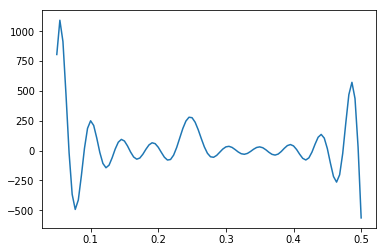

In [22]:
import numpy as np
import matplotlib.pyplot as plt
freqs = np.linspace(0.5,0.5,100)
plt.plot(freqs,sim.ldos_data)

In [ ]:
#!export PYTHONPATH=/usr/local/lib/python2.7/site-packages/
!rm PI.dat
!python PIT.py >& PI.out
!rm *.h5
!rm *.vtk
!python PIT.py 
!h5tovtk PIT-epsilon.h5

In [ ]:
!rm *.dat
!grep tmfreqs PI.out >> PI.dat

In [ ]:
%matplotlib inline
import csv
import numpy as np
import matplotlib.pyplot as plt
num_bands=8
nip_raw = []
k_raw = []
omega_raw = []

with open('PI.dat') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    next(csv_file)
    for row in csv_reader:
        nip_raw.append(row[1])
        k_raw.append(row[2:5])
        omega_raw.append(row[6:num_bands+6])

N=np.size(nip_raw)
nip=np.zeros((N))
k=np.zeros((N,3))
omega=np.zeros((N,num_bands))
for i in range(0,N):
    nip[i] = float(nip_raw[i])
    for j in range(0,3):
        k[i][j] = float(k_raw[i][j])
        
    for j in range(0,num_bands):
        omega[i][j] = float(omega_raw[i][j])

plt.plot(nip,omega[:,:])

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(1,2)
plt.show()


In [ ]:
!pip install -U matplotlib